In [6]:
import time
start = time.time()

In [7]:
import os
import cv2
import random
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
import keras.metrics
from keras.models import Sequential
from keras.layers import Flatten, MaxPooling2D, Conv2D, Dense
from sklearn.metrics import f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline, make_pipeline
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

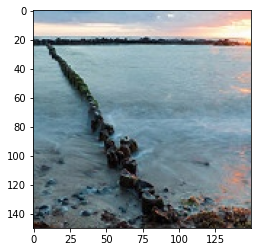

In [8]:
img_array = cv2.imread('/content/drive/MyDrive/archive/seg_pred/6.jpg')
img_array = cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB)
plt.imshow(img_array)
plt.show()

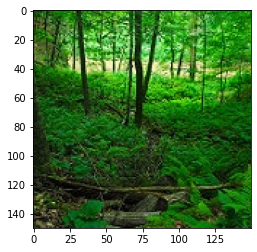

In [9]:
data = '/content/drive/MyDrive/archive/seg_test'
categories = ['forest','sea','street','mountain','glacier','buildings']
# For test our create_data function will be work
for ct in categories:
  path = os.path.join(data,ct)
  for img in os.listdir(path):
    img_array = cv2.imread(os.path.join(path,img))
    img_array = cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB)
    plt.imshow(img_array)
    plt.show()
    break
  break

In [10]:
print(img_array.shape)

(150, 150, 3)


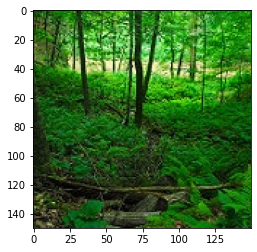

In [11]:
IMG_Size = 150
new_array = cv2.resize(img_array, (IMG_Size,IMG_Size))
plt.imshow(new_array)
plt.show()

In [12]:
training_data = []
test_data = []

def create_data(my_data_path,my_data):
    for ct in categories:
      path = os.path.join(my_data_path,ct)
      class_num = categories.index(ct)
      for img in os.listdir(path):
        datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./225)
        generator = datagen.flow_from_directory(my_data_path, shuffle=True, batch_size=32)
        try:
          img_array = cv2.imread(os.path.join(path,img),0)
          img_array = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
          new_array = cv2.resize(img_array, (IMG_Size,IMG_Size))
          my_data.append([new_array,class_num])
        except Exception as e:
          pass

In [ ]:
test_data_path = '/content/drive/MyDrive/archive/seg_test'
train_data_path = '/content/drive/MyDrive/archive/seg_train'
create_data(train_data_path,training_data)
create_data(test_data_path,test_data)

In [14]:
random.shuffle(training_data)
random.shuffle(test_data)

for sample in training_data[:10]:  # For test shuflle
  print(sample[1])

3
1
4
4
1
5
5
1
2
5


In [15]:
x = []
y = []

for features, label in training_data:
  x.append(features)
  y.append(label)

x_test = []
y_test = []

for features, label in test_data:
  x_test.append(features)
  y_test.append(label)

In [16]:
y = np.array(y)
y_test = np.array(y_test)

In [17]:
x = np.array(x).reshape(-1, IMG_Size, IMG_Size, 3)

In [18]:
x_test = np.array(x_test).reshape(-1, IMG_Size, IMG_Size, 3)

In [19]:
x.shape,y.shape,x_test.shape,y_test.shape

((14039, 150, 150, 3), (14039,), (3000, 150, 150, 3), (3000,))

In [71]:
early_stopping_monitor = EarlyStopping(monitor='accuracy', patience=5, restore_best_weights=True)

reduce_lr_on_plateau = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='accuracy',
    patience=3,
)

best_model = ModelCheckpoint('/content/drive/MyDrive/bestmodel.hdf5', monitor='accuracy', save_best_only=True)
best_val_acc = ModelCheckpoint('/content/drive/MyDrive/best_val_acc.hdf5', monitor='val_accuracy', save_best_only=True)

In [72]:
# y = y.reshape(-1,1)
# y_test = y_test.reshape(-1,1)

In [73]:
x.shape,y.shape,x_test.shape,y_test.shape

((100, 150, 150, 3), (100, 1), (3000, 150, 150, 3), (3000, 1))

In [74]:
# from sklearn.preprocessing import OneHotEncoder

# enc = OneHotEncoder(handle_unknown='ignore')
# enc.fit(y)
# enc.fit(y_test)

OneHotEncoder(handle_unknown='ignore')

In [75]:
# x = x[:100]
# y = y[:100]

In [76]:
x.shape,y.shape,x_test.shape,y_test.shape

((100, 150, 150, 3), (100, 1), (3000, 150, 150, 3), (3000, 1))

In [101]:
model = Sequential()

model.add(Conv2D(32, (3,3), input_shape=(150, 150, 3) , activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(tf.keras.layers.Dropout(.2))
model.add(Dense(6, activation='softmax'))

opt = tf.keras.optimizers.Adam(learning_rate=0.001, decay=1e-6)

# Compile model
model.compile(
    loss='sparse_categorical_crossentropy', # binary_crossentropy, sparse_categorical_crossentropy, categorical_crossentropy
    optimizer=opt,
    run_eagerly=True,
    metrics=['accuracy']
)

hist = model.fit(x, y, validation_split=.1, verbose=2, epochs=20, shuffle=True, batch_size=64, callbacks=[best_model, best_val_acc])

Epoch 1/20
2/2 - 4s - loss: 366.8369 - accuracy: 0.1889 - val_loss: 736.8090 - val_accuracy: 0.2000 - 4s/epoch - 2s/step
Epoch 2/20
2/2 - 4s - loss: 532.1061 - accuracy: 0.2000 - val_loss: 11.6868 - val_accuracy: 0.0000e+00 - 4s/epoch - 2s/step
Epoch 3/20
2/2 - 4s - loss: 14.7892 - accuracy: 0.2000 - val_loss: 19.2288 - val_accuracy: 0.1000 - 4s/epoch - 2s/step
Epoch 4/20
2/2 - 4s - loss: 13.0976 - accuracy: 0.2444 - val_loss: 19.6944 - val_accuracy: 0.3000 - 4s/epoch - 2s/step
Epoch 5/20
2/2 - 4s - loss: 15.5872 - accuracy: 0.2444 - val_loss: 5.2549 - val_accuracy: 0.1000 - 4s/epoch - 2s/step
Epoch 6/20
2/2 - 4s - loss: 3.0609 - accuracy: 0.3000 - val_loss: 1.4629 - val_accuracy: 0.3000 - 4s/epoch - 2s/step
Epoch 7/20
2/2 - 4s - loss: 1.6996 - accuracy: 0.3889 - val_loss: 2.9661 - val_accuracy: 0.1000 - 4s/epoch - 2s/step
Epoch 8/20
2/2 - 4s - loss: 1.7099 - accuracy: 0.2667 - val_loss: 2.0608 - val_accuracy: 0.1000 - 4s/epoch - 2s/step
Epoch 9/20
2/2 - 4s - loss: 1.6219 - accuracy: 0

In [79]:
hist.history??

In [80]:
def visualization(name,h,color):
  t = h.history[name]
  my_max = max(t)
  my_min = min(t)
  print(f'Name : {name} max : {my_max} min : {my_min}')
  plt.plot(t,color=color,linewidth=3.0)
  plt.title(name)
  plt.ylabel(name)
  plt.xlabel('Epoch')
  plt.legend([name],loc='upper left')
  plt.show()

Name : accuracy max : 0.9888888597488403 min : 0.15555556118488312


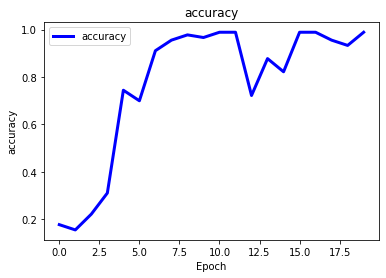

Name : loss max : 522.545166015625 min : 0.03456410393118858


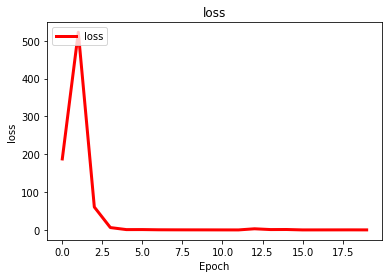

Name : val_accuracy max : 0.6000000238418579 min : 0.10000000149011612


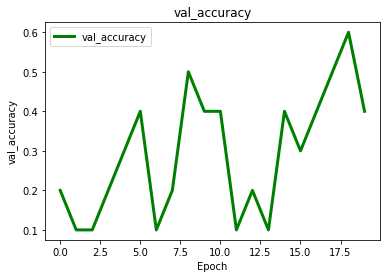

Name : val_loss max : 741.2326049804688 min : 1.9743601083755493


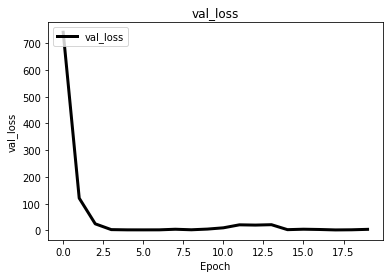

In [81]:
visualization('accuracy',hist,'Blue')
visualization('loss',hist,'Red')
visualization('val_accuracy',hist,'Green')
visualization('val_loss',hist,'Black')

In [83]:
model.load_weights('/content/drive/MyDrive/bestmodel.hdf5')
res = model.evaluate(x_test, y_test)
print("test loss, test acc:", res)

94/94 [==============================] - 40s 421ms/step - loss: 7.4174 - accuracy: 0.2483
test loss, test acc: [7.417403697967529, 0.24833333492279053]


In [84]:
model.load_weights('/content/drive/MyDrive/best_val_acc.hdf5')
res = model.evaluate(x_test, y_test)
print("test loss, test acc:", res)

94/94 [==============================] - 36s 379ms/step - loss: 4.0045 - accuracy: 0.3270
test loss, test acc: [4.0045166015625, 0.3269999921321869]


In [85]:
def my_predict(my_model,my_x_test):
  y_pred = my_model.predict(my_x_test)
  return y_pred

In [86]:
def my_f1_score(my_y_test,my_y_pred):
  f1 = f1_score(my_y_test, my_y_pred, average="micro")
  return f1

In [87]:
def my_conf_matrix(my_y_test,my_y_pred):
  cm = confusion_matrix(my_y_test, my_y_pred)
  cm_norm = np.round(cm/np.sum(cm,axis=1).reshape(-1,1),2)
  sns.heatmap(cm_norm,cmap='Greens',annot=True,
              cbar_kws={'orientation' : 'vertical','label' : 'Color bar'},
              fmt='.2f'
              )
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.show()
  # cm_display = ConfusionMatrixDisplay(cm)
  # cm_display.plot()
  # plt.show()

In [88]:
y_pred_res = my_predict(model,x_test)

94/94 [==============================] - 33s 352ms/step


In [92]:
y_pred_res = np.argmax(y_pred_res, axis=-1)

In [93]:
y_pred_res.shape,y_test.shape

((3000,), (3000, 1))

In [94]:
print(my_f1_score(y_test,y_pred_res))

0.327


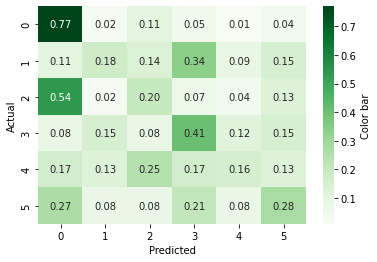

In [95]:
my_conf_matrix(y_test,y_pred_res)

In [96]:
newpath = r'/content/drive/MyDrive/archive/Model' 
if not os.path.exists(newpath):
    os.makedirs(newpath)

In [97]:
import pickle
# To save model  || You can use tensorflow model.save
pickle_out = open('/content/drive/MyDrive/archive/Model/model.pickle','wb')
pickle.dump(model,pickle_out)
pickle_out.close()

In [98]:
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_47 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_32 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_48 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_33 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_49 (Conv2D)          (None, 34, 34, 64)        36928     
                                                                 
 flatten_16 (Flatten)        (None, 73984)           

In [99]:
end = time.time()
print((end - start)/60)

635.4299713174502


In [100]:
# For load model
pickle_in = open('/content/drive/MyDrive/archive/Model/model.pickle','rb')
model = pickle.load(pickle_in)